In [11]:
import graph_tool.all as gt
import matplotlib

In [2]:
def read_edgelist(filename, graph):
    with open(filename) as f:
        data = f.readlines()
        data = [item.strip() for item in data]
        data = [item.split(" ") for item in data]
        data = [[int(item[0]), int(item[1])] for item in data]
        vertexDict = {}
        for edge in data:
            # Check if we have made a vertex object for the start/end of edge
            if edge[0] in vertexDict:
                v1 = vertexDict[edge[0]]
            else:
                v = graph.add_vertex()
                vertexDict[edge[0]] = v
                v1 = vertexDict[edge[0]]
            if edge[1] in vertexDict:
                v2 = vertexDict[edge[1]]
            else:
                # Create the second vertex
                v = graph.add_vertex()
                vertexDict[edge[1]] = v
                v2 = vertexDict[edge[1]]
            graph.add_edge(v1, v2)
        return graph, vertexDict

In [19]:
g = gt.Graph()

g, vertexDict = read_edgelist("bn-mouse_visual-cortex_1.edges", g)

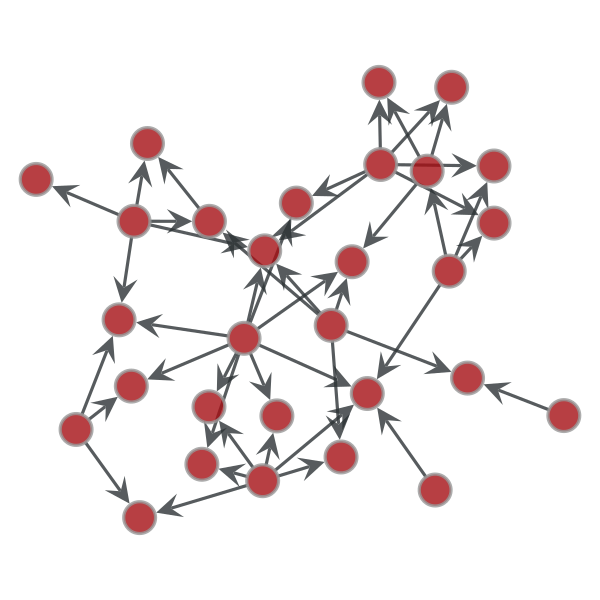

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b08ab128, at 0x7f10b290f1d0>

In [30]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos)

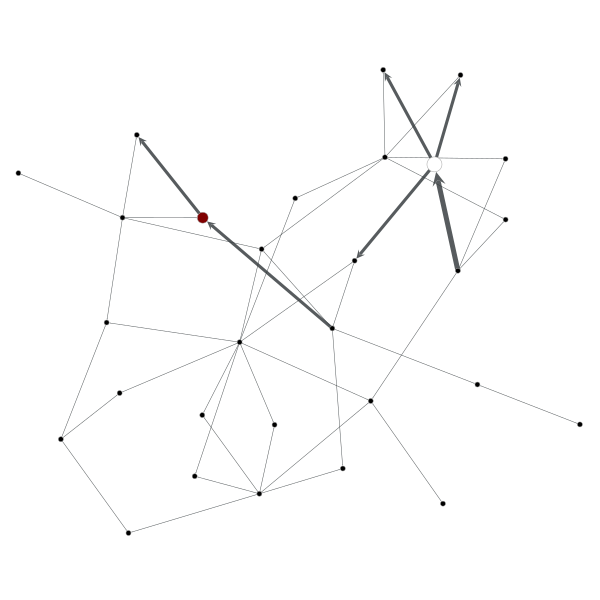

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b08ab128, at 0x7f10b290f1d0>

In [31]:
vp, ep = gt.betweenness(g)
gt.graph_draw(g, pos = pos, vertex_fill_color=vp, vertex_size=gt.prop_to_size(vp, mi=5, ma=15),edge_pen_width=gt.prop_to_size(ep, mi=0.5, ma=5), vcmap=matplotlib.cm.gist_heat,vorder=vp)

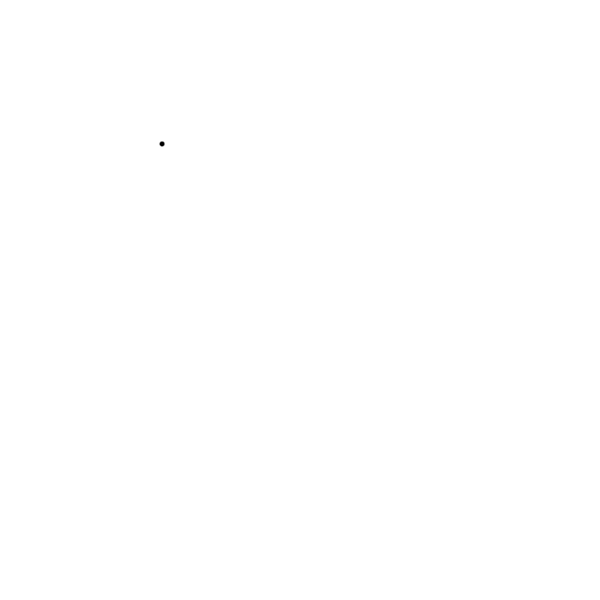

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b290bba8, at 0x7f10b3aebb00>

In [16]:
x = gt.katz(g)
gt.graph_draw(g, pos = pos, vertex_fill_color=x,vertex_size=gt.prop_to_size(x, mi=5, ma=15),vcmap=matplotlib.cm.gist_heat,vorder=x)


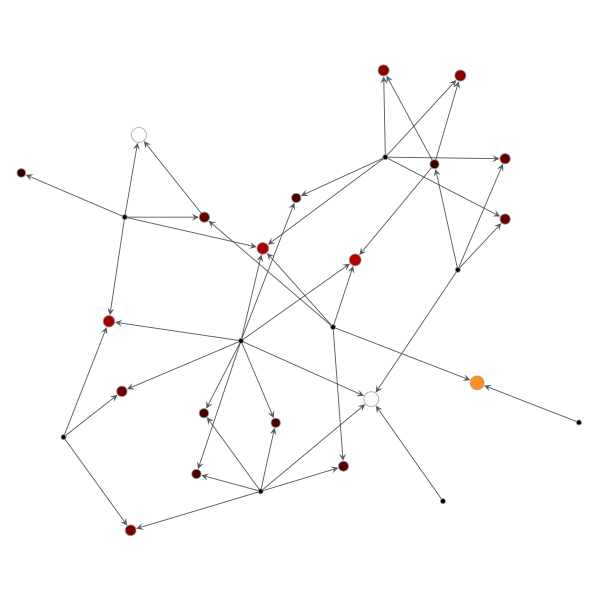

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b08ab128, at 0x7f10b290f1d0>

In [32]:
pr = gt.pagerank(g)
gt.graph_draw(g, pos = pos,vertex_size=gt.prop_to_size(pr, mi=5, ma=15), vertex_fill_color=pr, vcmap=matplotlib.cm.gist_heat,vorder=pr)